# Creating Dataframe

In [1]:
%reset -f
import glob, os, sys, io
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import pandas as pd
import numpy as np

from wavhandler import *
from utils import *
import multiprocessing

import logging
logger = logging.getLogger()
logger.propagate = False
logger.setLevel(logging.ERROR)
np.random.seed(0)
import seaborn as sns
sns.set()

In [2]:
def process_parallel(path):
    data, _ = read_simple([path])
    fname = path.split('/')[-1][:-4]
    processed = process_signal(fname=fname, data=data)
    df = pd.DataFrame.from_dict(processed, orient='index').reset_index()
    df['names'] = path
    return df

def make_insect_df(insect_class='Culex'):

    #insect_class='Culex'
    cpus = multiprocessing.cpu_count()
    wavhdlr = WavHandler('/home/yannis/data/insects/Potamitis/Wingbeats/{}'.format(insect_class), sample_size=-1, recursive=True)
    names = wavhdlr.wav_filenames
    pool = multiprocessing.Pool(processes=cpus)
    result_list = []
    result_list.append(pool.map(process_parallel, names))
    df = pd.concat(result_list[0], axis=0, sort=False)
    df.to_csv('./data/'+insect_class+'.csv', sep=';')
    print('{} done.'.format(insect_class))

In [3]:
make_insect_df(insect_class='Culex')
make_insect_df(insect_class='Anopheles')
make_insect_df(insect_class='Aedes')

/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child p

Culex done.


/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child p

Anopheles done.


/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child p

Aedes done.


# Reading and Exporting Dataframe

In [4]:
def read_insect_df(insect_class='Culex'):
    df = pd.read_csv('./data/'+insect_class+'.csv', delimiter=';')
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df.rename(columns={'index': 'fname'}, inplace=True)
    df['pathlen'] = df.names.apply(lambda x: len(x.split('/')))
    df['fnamelen'] = df.fname.apply(lambda x: len(x.split('_')))
    df['temp'] = df.fname.apply(lambda x: x.split('_')[-3] if len(x.split('_')) > 5 else np.nan)
    df['humd'] = df.fname.apply(lambda x: x.split('_')[-1] if len(x.split('_')) > 5 else np.nan)
    df['label1'] = insect_class
    df['label2'] = df.names.apply(lambda x: x.split("/")[-3])

    return df

In [5]:
df_culex = read_insect_df(insect_class='Culex')
df_anoph = read_insect_df(insect_class='Anopheles')
df_aedes = read_insect_df(insect_class='Aedes')

df = pd.concat([df_culex, df_anoph, df_aedes], axis=0)
df.sample(5)

,fname,pow0,pow1,pow2,fr0,fr1,fr2,damping_0,damping_1,damping_2,names,pathlen,fnamelen,temp,humd,label1,label2
101434,F161220_213936_108_G_050,0.611851,0.316013,0.034060,468.75,968.75,1468.75,0.133333,0.096774,0.042553,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Culex,C. quinquefasciatus
38551,F170209_172424_016_G_050,0.801307,0.342264,0.095651,562.50,1125.00,1687.50,0.055556,0.027778,0.027778,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Aedes,Ae. aegypti
56083,F170121_231834_021_G_050,0.869196,0.300519,0.006246,812.50,1625.00,2437.50,0.038462,0.019231,0.025641,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Anopheles,An. gambiae
62293,F161219_233044_134_G_050,0.074835,0.747828,0.040374,468.75,937.50,1375.00,0.100000,0.050000,0.034091,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Culex,C. quinquefasciatus
35574,F161219_122956_039_G_050,0.259577,0.667077,0.007910,406.25,843.75,1218.75,0.115385,0.055556,0.064103,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,5,NaN,NaN,Culex,C. quinquefasciatus


In [6]:
df.to_pickle('./data/mosquitos_precleaning.pkl')

## Analyzing dataframe

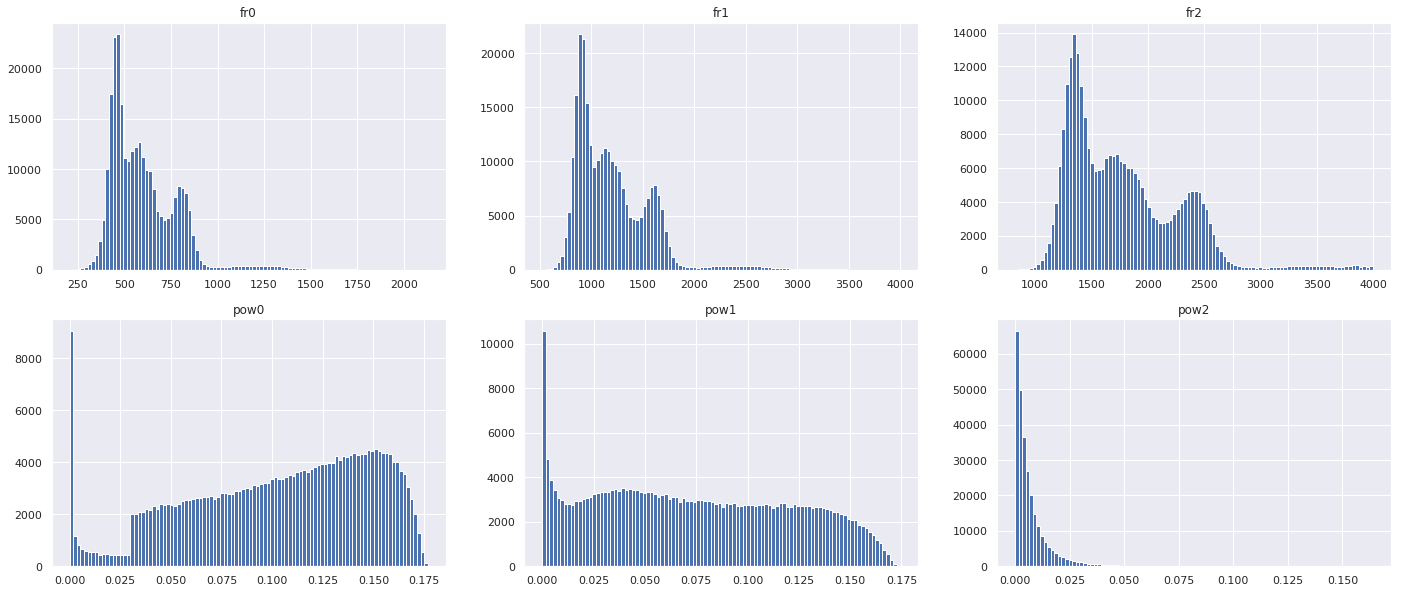

In [6]:
import matplotlib.pyplot as plt
nr_bins = 100
plt.figure(figsize=(24,10))
plt.subplot(2,3,1); plt.title('fr0'); df['fr0'].hist(bins=nr_bins)
plt.subplot(2,3,2); plt.title('fr1'); df['fr1'].hist(bins=nr_bins)
plt.subplot(2,3,3); plt.title('fr2'); df['fr2'].hist(bins=nr_bins)
plt.subplot(2,3,4); plt.title('pow0'); df['pow0'].hist(bins=nr_bins)
plt.subplot(2,3,5); plt.title('pow1'); df['pow1'].hist(bins=nr_bins)
plt.subplot(2,3,6); plt.title('pow2'); df['pow2'].hist(bins=nr_bins)
plt.show()

## After cleaning

In [21]:
df = df[(df.damping_0 > 0.005) & (df.damping_1 > 0.005) & (df.damping_2 > 0.005)]
df = df[(df.pow0 > 0.025)      & (df.pow1 > 0.005)      & (df.pow2 > 0.0005)]
df = df[(df.fr0 < 900.)        & (df.fr1 < 1800.)       & (df.fr2 < 3600.)]

df.shape

(267941, 17)

In [8]:
# df.to_pickle('./data/mosquitos.pkl')

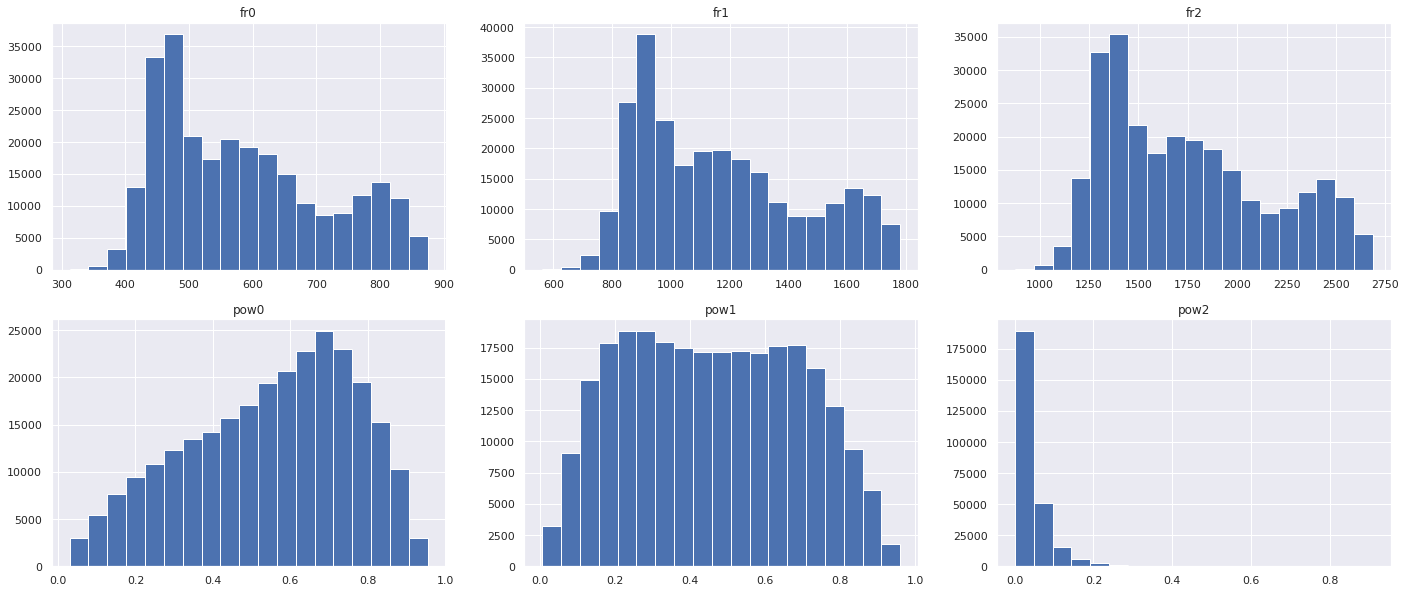

In [34]:
import matplotlib.pyplot as plt
nr_bins = 19
plt.figure(figsize=(24,10))
plt.subplot(2,3,1); plt.title('fr0'); df['fr0'].hist(bins=nr_bins)
plt.subplot(2,3,2); plt.title('fr1'); df['fr1'].hist(bins=nr_bins)
plt.subplot(2,3,3); plt.title('fr2'); df['fr2'].hist(bins=nr_bins)
plt.subplot(2,3,4); plt.title('pow0'); df['pow0'].hist(bins=nr_bins)
plt.subplot(2,3,5); plt.title('pow1'); df['pow1'].hist(bins=nr_bins)
plt.subplot(2,3,6); plt.title('pow2'); df['pow2'].hist(bins=nr_bins)
plt.show()

In [14]:
df.drop(['fname', 'names', 'pathlen', 'fnamelen'], axis=1).sample(10)

,pow0,pow1,pow2,fr0,fr1,fr2,damping_0,damping_1,damping_2,temp,humd,label1,label2
71655,0.124070,0.094315,0.007781,425.781250,836.914062,1257.812500,0.060780,0.028005,0.021739,NaN,NaN,Culex,C. quinquefasciatus
83921,0.057724,0.156458,0.031533,408.203125,812.500000,1216.796875,0.055024,0.028245,0.020465,NaN,NaN,Aedes,Ae. aegypti
62637,0.100843,0.133803,0.003229,466.796875,929.687500,1384.765625,0.047071,0.026261,0.021862,NaN,NaN,Culex,C. quinquefasciatus
62238,0.092668,0.116747,0.001398,769.531250,1546.875000,2314.453125,0.039975,0.018624,0.015612,NaN,NaN,Anopheles,An. gambiae
33998,0.061247,0.133920,0.009696,511.718750,1020.507812,1526.367188,0.047710,0.030622,0.012476,NaN,NaN,Aedes,Ae. aegypti
12733,0.163392,0.042066,0.010619,469.726562,936.523438,1395.507812,0.048857,0.028154,0.018195,25.9,69.7,Culex,C. pipiens
15398,0.149778,0.070239,0.001461,806.640625,1616.210938,2410.156250,0.029661,0.015106,0.011953,26.6,78.0,Anopheles,An. arabiensis
172,0.161626,0.058163,0.001133,650.390625,1295.898438,1940.429688,0.033784,0.019216,0.019124,NaN,NaN,Culex,C. pipiens
29642,0.163565,0.038956,0.001316,769.531250,1548.828125,2325.195312,0.029822,0.016078,0.008610,NaN,NaN,Anopheles,An. gambiae
15059,0.116956,0.098156,0.013890,604.492188,1197.265625,1819.335938,0.040388,0.027732,0.014761,25.9,64.8,Culex,C. pipiens


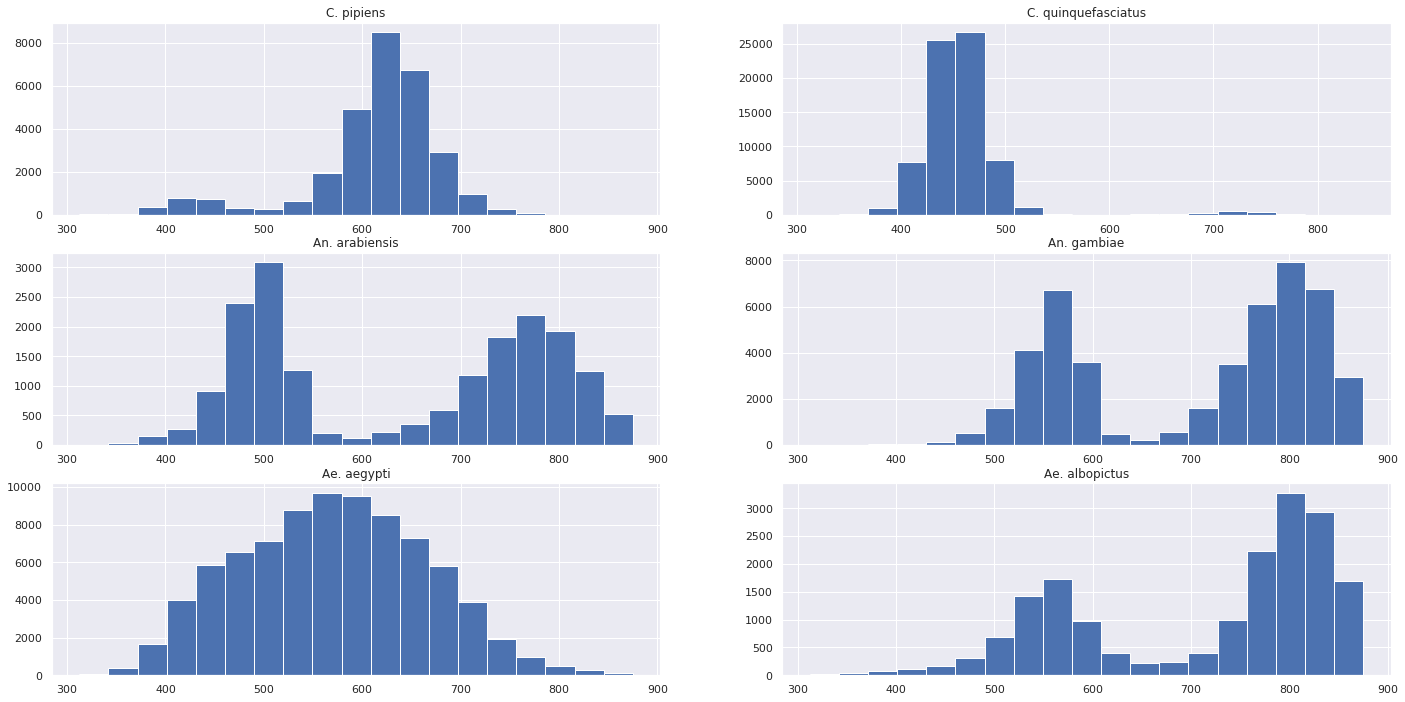

In [38]:
label = 'label2'
mosqlist = df[label].unique().tolist()
plt.figure(figsize=(24,12))
for i in range(len(mosqlist)):
    plt.subplot(3,2,i+1);
    plt.title(mosqlist[i]);
    df[df[label]==mosqlist[i]].fr0.hist(bins=19)
    #plt.ylim(0,8500)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_pickle('./data/mosquitos_precleaning.pkl')
#plt.rcParams.update({'font.size': 50})


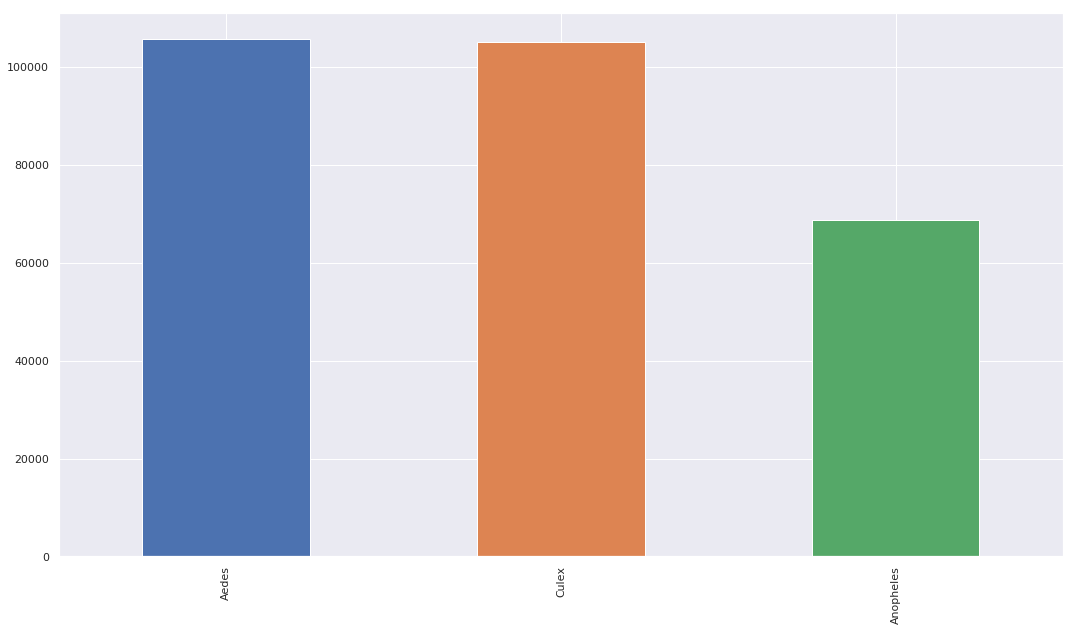

In [18]:
plt.figure(figsize=(18,10))
df.label1.value_counts().plot(kind='bar')

In [ ]:
df.drop(['fname', 'names', 'pathlen', 'fnamelen'], axis=1, inplace=True)

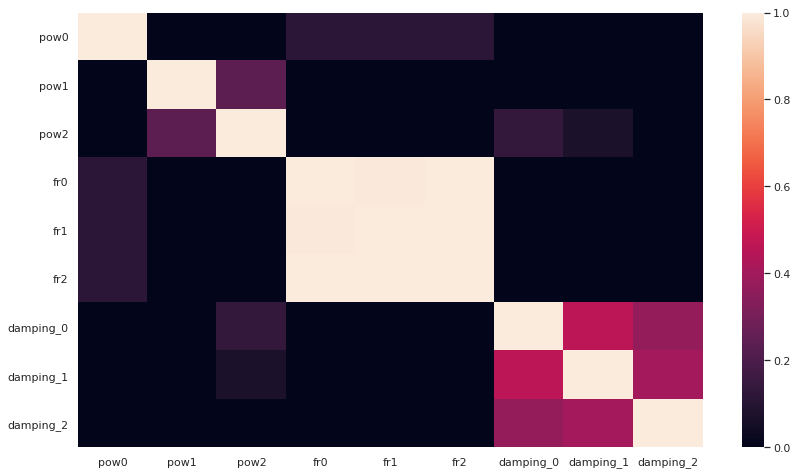

In [56]:
plt.figure(figsize=(14,8))
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=0,
        vmax=1)